<img src="https://i0.wp.com/mosefparis1.fr/wp-content/uploads/2022/10/cropped-image-1.png?w=532&ssl=1" width=90px align="left">


<hr style="border-width:2px;border-color:blue">
<div align="left"><span style="font-family:Lucida Caligraphy;font-size:20px"><center><h1>
Deep-Learning
</h1></center></span></div>


<div align="left"><span style="font-family:Lucida Caligraphy;font-size:20px"><center><h1>
Biosonar - Odontoceti Click Detection
</h1></center></span></div>

<div align="left"><span style="font-family:Lucida Caligraphy;font-size:10px"><center><h1>
Projet réalisé par : ABABII Anisoara et MOUSSA Yasmina
</h1></center></span></div>

<div align="left"><span style="font-family:Lucida Caligraphy;font-size:10px"><center><h1>
Projet suivi par : YURCHAK Roman 
</h1></center></span></div>


<hr style="border-width:2px;border-color:blue">
<div align="left"><span style="font-family:Lucida Caligraphy;font-size:20px">

Le projet est basé sur un challenge de l'ENS nommé "Biosonar - Odontoceti Click Detection" par l'Université de Toulon. Les données sont des enregistrements d'audios de sons de dauphins et des sons d'autres animaux marins. Le but du projet est de répondre à la question suivante: l'audio est-il un biosonar (son de dauphin) ou un son perturbateur (autres animaux marins)? Pour résoudre cette problématique, nous allons prendre en input les audios dans différents modèles de Machine Learning et Deep Learning.

Le jeu de données est composé de fichier audio wav pour l'ensemble d'entraînement pour l'ensemble de test. 
les données sont disponibles sur le site: https://challengedata.ens.fr/participants/challenges/85/ 
Le dosier à télécharger : x_train

Chaque fichier audio wav de 200 millisecondes contient un clic de biosonar ou un bruit de fond avec des transitoires. Le clic/transitoire potentiel est centré dans le signal. Il peut y en avoir un seul ou plusieurs. Chaque fichier wav est dynamique sur 16 bits, avec une fréquence d'échantillonnage de 256 000 Hz. Les fichiers audio d'entraînement sont dans le dossier X_train.zip. Ce dossier contient environ  8 000 fichiers et environ 6 000 fichiers pour le test.

Format de Y_train.csv :
[id, pos_label]
1250-JAM, 0
1251-JAM, 1
1252-BON, 1

Description de l'ID :
L'ID correspond au nom du fichier audio. Il est composé d'un index d'enregistrement et du nom de la session d'enregistrement. Le format de l'ID est le suivant :
[INDEX]-[RECCODING_SESSION]

Les noms de session d'enregistrement sont :
"JAM", "BON", "BAHAMAS", "GUA", "ARUBA", "StEUS", "StMARTIN", "BAHAMAS"

Pendant la phase d'évaluation, nous avons procedé à un split en train_test_split a partir de dosier téléchargé.

Description de l'étiquette :

pos_label = 1 : "X contient un biosonar détecté (dauphin, delphinidé)"
pos_label = 0 : "X ne contient pas de biosonar détecté (bruit)"

### La structure du projet est la suivante : 
- I - [Préparation du dataset](#preparation)
- II - [Classification avec modele benchmark et deep learning](#model)
- III - [Conclusion](#test)
### Instructions
<hr style="border-width:2px;border-color:blue">

- To use this project, you must make the follow commands:

pip install -r requirements.txt

- If you use conda virtual env:

conda env create -f environment.yml

conda activate paraphrase-identification
</span></div>




In [28]:
import soundfile as sf
import librosa.display
import librosa as lr
from librosa import display
import numpy as np
import librosa.display
import librosa as lr
from scipy import signal
import os
import pandas as pd
import librosa.feature as feat
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold


<div align="left"><span style="font-family:Lucida Caligraphy;font-size:10px"><h1>
Les données sur lesquelles nous avons travaillé sont des données audios, il faudra donc les importés avec des package spéciaux comme soundfile afin de pouvoir les visualisés. Voici un exemple de visualisation de son:
</h1></span></div>

In [51]:
sig, sr = sf.read("audio_example.wav")
print("Taille du signal : %s"%sig.shape)

def import_image(file_path):
    sig, sr = sf.read("audio_example.wav")
    print("Taille du signal : %s"%sig.shape)

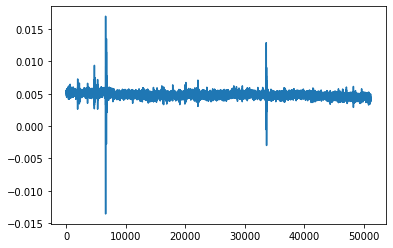

In [52]:
#plot le son
import matplotlib.pyplot as plt
plt.plot(sig)
plt.show()

In [54]:
#applique une transformation stft sur nos sons
tf_sig = lr.stft(sig, n_fft=2048)
tf_sig = np.abs(tf_sig)
tf_sig

array([[2.67912345e+00, 4.86587120e+00, 5.32621246e+00, ...,
        4.60062195e+00, 4.10251372e+00, 2.21285283e+00],
       [2.17007558e+00, 2.89054905e+00, 2.67829914e+00, ...,
        2.33043302e+00, 2.43141190e+00, 1.78606423e+00],
       [1.14184609e+00, 4.06310733e-01, 1.56696457e-02, ...,
        2.43110074e-02, 2.90000296e-01, 9.25618215e-01],
       ...,
       [2.73283262e-03, 1.44856061e-03, 1.38062822e-04, ...,
        2.76606300e-04, 1.30773835e-03, 2.33208325e-03],
       [2.77221219e-03, 1.35419450e-03, 1.65126377e-04, ...,
        2.41596288e-04, 8.61870868e-04, 2.16337033e-03],
       [2.78957576e-03, 1.50546168e-03, 1.89096143e-04, ...,
        3.08705129e-04, 1.20277061e-03, 2.15046885e-03]])


<div align="left"><span style="font-family:Lucida Caligraphy;font-size:12px"><h1>
On a ensuite appliquer une transformation STFT Fourrier à court terme pour traiter nos signaux et donc obtenir les fréquences de l'audio dans une dimension temporelle.

Le signal peut ausssi être représenter sous forme d'un spectogramme:

</h1></span></div>

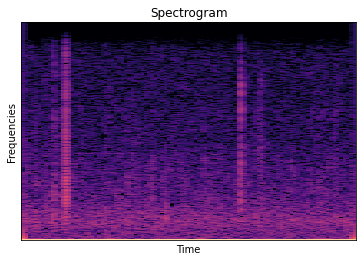

In [55]:
#visualise le spectogram
lr.display.specshow(lr.amplitude_to_db(tf_sig, ref=np.max));plt.title("Spectrogram");plt.xlabel("Time"); plt.ylabel("Frequencies");plt.show()

<div align="left"><span style="font-family:Lucida Caligraphy;font-size:10px"><h1>
Le signal représenté ici est un signal positif, c'est à dire un biosonar. Les signaux positifs seront représentés par 1 et 0 sinon dans nos données: c'est un problème de classification binaire. 
</h1></span></div>

<div align="left"><span style="font-family:Lucida Caligraphy;font-size:16px"><h1>
Creation des features
</h1></span></div>


<div align="left"><span style="font-family:Lucida Caligraphy;font-size:10px"><h1>
La prochaine étape est de créer les features que nous allons implémentés dans notre modèle. Pour cela, nous avons extrait des caractéristiques des audios

Ce code effectue l'extraction de caractéristiques audio à partir d'un fichier audio au format WAV. On applique un filtre de Butterworth pour obtenir que les signaux entre 5000 et 100000 Hz. Ensuite, on applique un filtre IIR qui permet d'éviter les problèmes d'instabilités qui peuvent provenir d'autres filtrage. Puis on calcul l'amplitude moyenne du signal, son centre de gravité spectral, la largeur spectrale et la platitude spectrale. On calcul ensuite la moyenne, l'écart-type, la valeur minimale pour chacune de ces quatre caractéristiques pour enfin obtenir 16 inputs pour chaque audio.
</h1></span></div>


In [2]:
#extraction de features du sons, exemple pour un son
filename = 'X_train/00000-JAM.wav'
sig, sr = sf.read(filename)

sos = signal.butter(6, [5000, 100000], 'bandpass', fs=sr, output='sos')
sig = signal.sosfiltfilt(sos, sig)
rms = feat.rms(y=sig) 
sc = feat.spectral_centroid(y=sig, sr=sr)
sb = feat.spectral_bandwidth(y=sig,sr=sr)
sf = feat.spectral_flatness(y=sig)

features = [np.mean(rms), np.std(rms), np.min(rms), np.max(rms),\
            np.mean(sc), np.std(sc), np.min(sc), np.max(sc),\
            np.mean(sb), np.std(sb), np.min(sb), np.max(sb),\
            np.mean(sf), np.std(sf), np.min(sf), np.max(sf)]
#features

In [24]:
# Define a function to extract features from an audio file
def extract_features(filepath):
    
    # Read audio file and extract audio features
    sig, sr = sf.read(filepath)
    
    sos = signal.butter(6, [5000, 100000], 'bandpass', fs=sr, output='sos')
    sig = signal.sosfiltfilt(sos, sig)
    rms = feat.rms(y=sig) 
    sc = feat.spectral_centroid(y=sig, sr=sr)
    sb = feat.spectral_bandwidth(y=sig,sr=sr)
    flatness = feat.spectral_flatness(y=sig) # Use a different variable name for spectral flatness

    # Extract desired features
    features = [np.mean(rms), np.std(rms), np.min(rms), np.max(rms),\
                np.mean(sc), np.std(sc), np.min(sc), np.max(sc),\
                np.mean(sb), np.std(sb), np.min(sb), np.max(sb),\
                np.mean(flatness), np.std(flatness), np.min(flatness), np.max(flatness)]
    
    return features

# Set the folder path containing the audio files
folder_path = 'X_train/'

# Create a list of filepaths for all the audio files in the folder
filepaths = [os.path.join(folder_path, filename) for filename in os.listdir(folder_path)]

# Use a lambda function to extract features for each file and store them in a pandas DataFrame
df = pd.DataFrame({'id': [os.path.splitext(os.path.basename(filepath))[0] for filepath in filepaths], 
                   'features': list(map(lambda filepath: extract_features(filepath), filepaths))})

# Print the resulting DataFrame
print(df)

                   id                                           features
0           00000-JAM  [0.0003059469, 6.6535285e-05, 0.00018805137, 0...
1           00001-JAM  [0.00033585544, 0.00012458945, 0.0001679505, 0...
2           00002-JAM  [0.00035028392, 0.00016339656, 0.00016073148, ...
3           00003-JAM  [0.0003374822, 0.00016663235, 0.00019194071, 0...
4           00004-JAM  [0.0003373943, 0.00016623756, 0.00017905649, 0...
...               ...                                                ...
23163  23163-StMARTIN  [0.0016141448, 0.0030767939, 6.5778324e-05, 0....
23164  23164-StMARTIN  [0.0054236674, 0.006420335, 6.5778324e-05, 0.0...
23165  23165-StMARTIN  [0.007479933, 0.0068401406, 6.530506e-05, 0.02...
23166  23166-StMARTIN  [0.01400975, 0.0033231128, 0.00053156755, 0.02...
23167  23167-StMARTIN  [0.012638905, 0.006016641, 0.00015587095, 0.02...

[23168 rows x 2 columns]


In [34]:
y_train = pd.read_csv('Y_train.csv')
df['id'] = df['id'] + '.wav'

In [35]:
merged_df = pd.merge(df, y_train, on='id')
merged_df

,id,features,pos_label
0,00000-JAM.wav,"[0.0003059469, 6.6535285e-05, 0.00018805137, 0...",0.0
1,00001-JAM.wav,"[0.00033585544, 0.00012458945, 0.0001679505, 0...",1.0
2,00002-JAM.wav,"[0.00035028392, 0.00016339656, 0.00016073148, ...",1.0
3,00003-JAM.wav,"[0.0003374822, 0.00016663235, 0.00019194071, 0...",1.0
4,00004-JAM.wav,"[0.0003373943, 0.00016623756, 0.00017905649, 0...",1.0
...,...,...,...
23163,23163-StMARTIN.wav,"[0.0016141448, 0.0030767939, 6.5778324e-05, 0....",0.0
23164,23164-StMARTIN.wav,"[0.0054236674, 0.006420335, 6.5778324e-05, 0.0...",0.0
23165,23165-StMARTIN.wav,"[0.007479933, 0.0068401406, 6.530506e-05, 0.02...",0.0
23166,23166-StMARTIN.wav,"[0.01400975, 0.0033231128, 0.00053156755, 0.02...",0.0


In [ ]:
merged_df.to_csv('df_final.csv', index=False)


<div align="left"><span style="font-family:Lucida Caligraphy;font-size:16px"><h1>
Modélisation : Machine Learning VS Deep Learning
</h1></span></div>


<div align="left"><span style="font-family:Lucida Caligraphy;font-size:10px"><h1>
Nous allons tester deux types de modèles : un modèle de Machine Learning (Régression Logistique) et un modèle de Deep Learning (architecture de neurones). On divise notre base de données en train et test. Pour cela, nous avons décidé d'appliquer un stratified K-fold afin de trouver un effectif équilibré de 1 et de 0 (la variable target) entre les deux bases et non de faire un split test/train random. 
</h1></span></div>



In [2]:
merged_df = pd.read_csv('df_final.csv')
merged_df.head(4)

,id,features,pos_label
0,00000-JAM.wav,"[0.0003059469, 6.6535285e-05, 0.00018805137, 0...",0.0
1,00001-JAM.wav,"[0.00033585544, 0.00012458945, 0.0001679505, 0...",1.0
2,00002-JAM.wav,"[0.00035028392, 0.00016339656, 0.00016073148, ...",1.0
3,00003-JAM.wav,"[0.0003374822, 0.00016663235, 0.00019194071, 0...",1.0


<div align="left"><span style="font-family:Lucida Caligraphy;font-size:16px"><h1>
1. Modele de base /BENCHMARK: Regression Logistique</h1></span></div>

In [3]:
n_splits = 5
target_col = 'pos_label'
skf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

for fold, (train_idx, test_idx) in enumerate(skf.split(merged_df, merged_df[target_col])):
    train_df = merged_df.iloc[train_idx]
    test_df = merged_df.iloc[test_idx]

X_train=train_df['features'].tolist()
X_test=test_df['features'].tolist()

y_train=train_df['pos_label']
y_test=test_df['pos_label']

In [4]:
X_train = np.array(train_df['features'])
X_train= np.array([eval(sample) for sample in X_train.flatten()]).reshape(X_train.shape[0], -1)

X_test = np.array(test_df['features'])
X_test= np.array([eval(sample) for sample in X_test.flatten()]).reshape(X_test.shape[0], -1)

y_train = np.array(train_df['pos_label'])
y_test = np.array(test_df['pos_label'])

In [5]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

c:\Users\ababi\Desktop\Deep_learning_Biosonar\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("ROC AUC Score: ", roc_auc)

ROC AUC Score:  0.8610792538214194


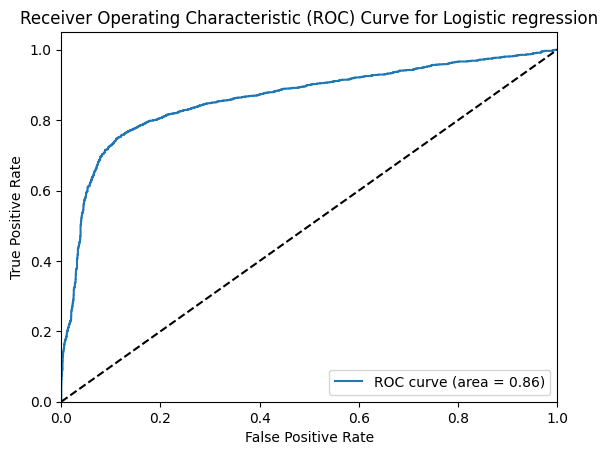

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic regression')
plt.legend(loc="lower right")
plt.show()


<div align="left"><span style="font-family:Lucida Caligraphy;font-size:10px"><h1>
La régression logistique est un bon choix de modèle dans notre cas car on travail sur un problème de classification binaire. La métrique utilisée pour évaluer notre modèle est l'AUC. On obtient de très bon résultat avec un AUC égal à 0,86 qui est proche de un et donc représente un modèle performant. L'air en dessous de la courbe est grand, comme on peut le voir sur le graphique ci-dessus.</h1></span></div>



<div align="left"><span style="font-family:Lucida Caligraphy;font-size:16px"><h1>
2. Modele de Deep Learning Modelisation</h1></span></div>

In [2]:
merged_df = pd.read_csv('df_final.csv')
merged_df.head(4)

,id,features,pos_label
0,00000-JAM.wav,"[0.0003059469, 6.6535285e-05, 0.00018805137, 0...",0.0
1,00001-JAM.wav,"[0.00033585544, 0.00012458945, 0.0001679505, 0...",1.0
2,00002-JAM.wav,"[0.00035028392, 0.00016339656, 0.00016073148, ...",1.0
3,00003-JAM.wav,"[0.0003374822, 0.00016663235, 0.00019194071, 0...",1.0


In [3]:
target_col = 'pos_label'
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# split the data into train and test sets
for fold, (train_idx, test_idx) in enumerate(skf.split(merged_df, merged_df[target_col])):
    train_df = merged_df.iloc[train_idx]
    test_df = merged_df.iloc[test_idx]

In [4]:
train_df.head(4)

,id,features,pos_label
0,00000-JAM.wav,"[0.0003059469, 6.6535285e-05, 0.00018805137, 0...",0.0
1,00001-JAM.wav,"[0.00033585544, 0.00012458945, 0.0001679505, 0...",1.0
2,00002-JAM.wav,"[0.00035028392, 0.00016339656, 0.00016073148, ...",1.0
3,00003-JAM.wav,"[0.0003374822, 0.00016663235, 0.00019194071, 0...",1.0


In [5]:
X_train = np.array(train_df['features'])
X_train= np.array([eval(sample) for sample in X_train.flatten()]).reshape(X_train.shape[0], -1)

X_test = np.array(test_df['features'])
X_test= np.array([eval(sample) for sample in X_test.flatten()]).reshape(X_test.shape[0], -1)

y_train = np.array(train_df['pos_label'])
y_test = np.array(test_df['pos_label'])

X_test.shape

(4633, 16)

In [6]:
X_train.shape

(18535, 16)

<div align="left"><span style="font-family:Lucida Caligraphy;font-size:10px"><h1>
L'architecture du modèle est la suivante :

- on met en input nos features dans une première couche  de "Convolution1D". La couche de convolution permet d'appliquer des filtres à nos inputs extrayant les variables les plus importantes. On combine cette couche avec une fonction d'activation ReLu qui resors un output de zéro si l'output de base est inférieur à zéro.

- La seconde étape consiste à créer une couche de GlobalMaxPooling qui nous permet de réduire la dimension de nos données d'entrées. Le GlobalMaxPooling prend la valeur maximale de chaque vecteur d'input, résultant en un vecteur de plus petite taille. De cette façon, le modèle se concentre uniquement sur les variables les plus importantes pour la classification.

- La troisième couche est aussi une couche avec une fonction d'activation ReLu.

- La quatrième est une couche dropout qui nous permet d'appliquer une régularisation qui supprime certains neurones de la couche précédente afin d'éviter le surapprentissage ("overfitting). Nous avons ainsi décidé de le fixer à 0,25.

- La dernière couche prend en entrée les données de sortie des couches précédentes et leur applique la fonction d'activation "Sigmoid". La fonction "Sigmoid" est souvent utilisée dans un problème de classification binaire comme le nôtre.

</h1></span></div>



In [7]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, GlobalMaxPool1D
from keras.optimizers import Adam

# define the CNN model architecture
model1 = Sequential()
model1.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model1.add(GlobalMaxPool1D())
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(1, activation='sigmoid'))
# compile the model
model1.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 14, 64)            256       
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
______________________________________________________

c:\Users\ababi\Desktop\Deep_learning_Biosonar\.venv\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)




<div align="left"><span style="font-family:Lucida Caligraphy;font-size:10px"><h1>
Après avoir construit notre modèle, nous l'avons compilé.

- La fonction de coût choisi pour notre modèle est la "Binary crossentropy" étant donné qu'il s'agit de la plus adéquate pour un problème de classification binaire. Le but est de minimiser notre fonction de coût pour que l'erreur entre notre ÿ estimé et  y observé soit minime.

- Il s'agit d'appliquer une méthode de descente de gradient pour déterminer les paramètres optimaux (le poids et le biais). Au début, on initialise des poids et biais aléatoires. Le modèle tourne (forward propagation) et on obtient une probabilité grâce à la fonction d'activation (dans notre cas Sigmoid).
L'erreur est ensuite calculée avec la fonction de coût choisi. Le but est de rétropropager ("backpropager") la fonction de coût afin d'ajuster les poids pour qu'ils minimisent la fonction de coût. 

- La descente de gradient à lieu à cette étape, on veut trouver le minimum global de la fonction de coût. Cette dernière est convexe, quand on multiplie par la dérivée, on s'approche du minimum global. 

Nous commençons donc au point où la fonction de coût est élevée jusqu'à obtenir les poids optimaux minimisant la fonction de coût. Le taux d'apprentissage ("learning rate") est aussi un paramètre à préciser, Il définit la vitesse de la descente de gradient. Si on choisit un taux d'apprentissage trop faible, le modèle convergera plus lentement vers le minimum mais ce modèle expliquera bien les données. Si on choisit un taux d'apprentissage trop élevé, la vitesse de convergence augmentera mais il y aura un risque de ne pas atteindre le minimum optimal. Le taux d'apprentissage choisi pour notre modèle est de 0,001. Avec les nouveaux poids obtenus, on réapplique ainsi la forward propagation.

- L'optimiseur choisi pour notre modèle est l'optimiseur "Adam" (Adaptive Moment Estimation), qui est une méthode de descente de gradient stochastique. Cette méthode est efficace car elle adapte le taux d'apprentissage en fonction de nos paramètres.

</h1></span></div>


In [18]:
training_history = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
232/232 [==============================] - 1s 6ms/step - loss: 0.5212 - accuracy: 0.7433 - val_loss: 0.4274 - val_accuracy: 0.9622
Epoch 2/10
232/232 [==============================] - 1s 5ms/step - loss: 0.5201 - accuracy: 0.7431 - val_loss: 0.4260 - val_accuracy: 0.9630
Epoch 3/10
232/232 [==============================] - 1s 5ms/step - loss: 1.1603 - accuracy: 0.6889 - val_loss: 0.4169 - val_accuracy: 1.0000
Epoch 4/10
232/232 [==============================] - 1s 6ms/step - loss: 0.7257 - accuracy: 0.4902 - val_loss: 0.5468 - val_accuracy: 1.0000
Epoch 5/10
232/232 [==============================] - 1s 6ms/step - loss: 0.5920 - accuracy: 0.6702 - val_loss: 0.5475 - val_accuracy: 0.9622
Epoch 6/10
232/232 [==============================] - 1s 6ms/step - loss: 0.5417 - accuracy: 0.7290 - val_loss: 0.5010 - val_accuracy: 0.9714
Epoch 7/10
232/232 [==============================] - 2s 7ms/step - loss: 0.5829 - accuracy: 0.7287 - val_loss: 0.4608 - val_accuracy: 0.9943
Epoch 


<div align="left"><span style="font-family:Lucida Caligraphy;font-size:10px"><h1>

On obtient finalement un modèle avec une accuracy égal à 0.7433. Pour ce challenge, on va plutôt utiliser l'AUC pour évaluer notre modèle mais aussi pour la comparé à l'AUC de la régression logistique.

On obtient une AUC de 0.87 avec notre réseau de neurones ce qui est supérieur au résultat obtenu avec la régression logistique. On obtient la courbe suivante :
</h1></span></div>


145/145 [==============================] - 0s 3ms/step


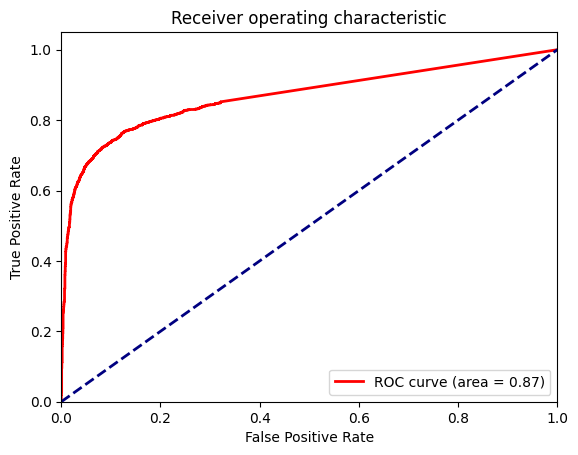

In [19]:
y_prob = model1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
# calculate the area under the curve using auc function
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


<div align="left"><span style="font-family:Lucida Caligraphy;font-size:16px"><h1>
3. Conclusion </h1></span></div>

<div align="left"><span style="font-family:Lucida Caligraphy;font-size:10px"><h1>
En conclusion, nous avons commencé par traiter et représenter nos données sonores afin d'extraire différentes features du son. Ensuite, nous avons tester deux modèles différents : la régression logistique et une architecture de réseaux de neurones. La métrique utilisée est l’AUC : elle est plus élevé pour le modèle de Deep que pour la régression logistique. Il faudrait donc garder le modèle le plus performant ici notre réseau de neurones. 


Ce modèle est plus avantageux que la régression logistique car on travaille avec des données très volumineuse, puisqu'on a plus d'information on peut se permettre de construire un modèle plus complexe qu'une simple régression logistique, ce qui nous permet d'obtenir de meilleurs résultats en terme d'accuracy.</h1></span></div>